In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm import tqdm

%matplotlib inline

In [5]:
df_members = pd.read_csv('members.csv', encoding = 'latin-1')
df_groups = pd.read_csv('groups.csv')

In [7]:
df_members.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id
0,3,not_found,New York,us,"New York, NY",2007-05-01 22:04:37,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2009-09-18 18:32:23,490552
1,3,not_found,New York,us,"New York, NY",2011-01-23 14:13:17,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-03-20 01:02:11,1474611
2,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:47:34,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-01-18 20:37:23,1490492
3,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2011-01-03 14:45:21,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-07-23 03:42:28,1515830
4,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:34:50,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-06-13 18:33:23,1574965


In [64]:
#create a series that contains only unique member_id
sr = pd.Series(df_members['member_id'].unique())
sr.head()

0     3
1     6
2    36
3    65
4    82
dtype: int64

In [40]:
def sample_mean(n):
    """Takes in the number to sample and return a sample mean."""
    
    x = np.random.choice(len(sr), n, replace = False)
    return df_members[df_members['member_id'].isin(sr.loc[x])].groupby('member_id').count()['group_id'].mean()

In [54]:
#create 10000 sample mean replicates to create a sampling distribution to estimate the population mean of groups 
#a user joins

sampling_dis = []

for i in tqdm(range(1000)):
    sampling_dis.append(sample_mean(100))

true_mean = np.mean(sampling_dis)
true_mean

100%|██████████| 1000/1000 [4:02:03<00:00, 14.52s/it]


5.4023799999999991

### Hypothesis Testing on the true mean of groups a user joins

The point of this hypothesis testing is to determine whether the estimated average group a user participates in is 5. This estimate was determine by generating a sampling distribution of the sample mean and taking the mean of the sampling distribution as the true mean. This value will give a benchmark on how active these users are. Hopefully, by figuring out the benchmark, it can be use to determine whether the recommendation system is helping in getting more users to join more groups, thus participating in more events if desired.

To begin the hypothesis testing, the null and alternative hypothesis are stated as follows:

$H_{o}: \mu = 5$

$H_{a}: \mu \neq 5$

A one sample t test will be used to determine if the p value is less than the significance level. If so, then the null hypothesis will be rejected and the alternative hypothesis will be accepted. The significance level will be preset to $\alpha = .05$.

t = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

This one sample t test was done twice, one by sampling 30 users for the sample mean 10000 times and the other by sampling 100 users for the sample mean 1000 time. As seen below,

$N = 30$

$t = 0.057876464979089021$

$p value = 0.95424399179146757$

Since the p value is greater than the significance level, there isnt strong enough evidence to reject the null hypothesis. The 95% confidence interval is computed to be $[2.7892711576093157, 8.1440621757240184]$ for this random sample with some positive skew.


$N = 100$

$t = -1.7170845940749131$

$p value = 0.089090650907894198$


Since the p value is greater than the significance level, there isnt strong enough evidence to reject the null hypothesis. The 95% confidence interval is computed to be $[3.1547834928576211, 5.5452165071423778]$ for this random sample. Compare to the positive skew with N = 30, it can be seen that the positive skew decreases as N increases.

In [47]:
#generate a sample mean and perform a one sample t test against the true mean
#sample = sample_mean(30)
random = np.random.choice(len(sr), 30, replace = False)
samples = df_members[df_members['member_id'].isin(sr.loc[random])].groupby('member_id').count()['group_id']
st.ttest_1samp(samples, true_mean)

Ttest_1sampResult(statistic=0.057876464979089021, pvalue=0.95424399179146757)

In [45]:
sample

3.433333333333333

In [48]:
#95% CI from the random sample with N = 30

mean = np.mean(samples)
std = np.std(samples)
st.norm.interval(0.95, loc=mean, scale=std/np.sqrt(30))

(2.7892711576093157, 8.1440621757240184)

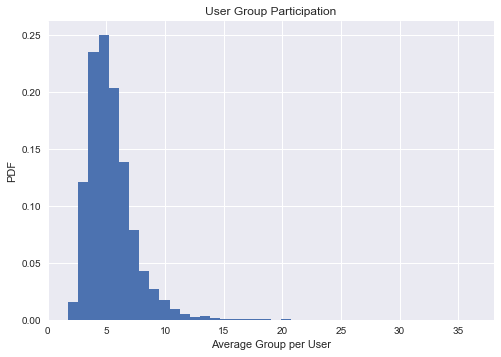

In [52]:
#plot sampling distribution of the sample mean for N = 30

_ = plt.hist(sampling_dis, bins = 40, normed = True)
_ = plt.xlabel('Average Group per User')
_ = plt.ylabel('PDF')
_ = plt.title('User Group Participation')
sns.set()
plt.show()

In [55]:
#this attempt is with sampling 100 for 1000 times

random = np.random.choice(len(sr), 100, replace = False)
samples = df_members[df_members['member_id'].isin(sr.loc[random])].groupby('member_id').count()['group_id']
st.ttest_1samp(samples, true_mean)

Ttest_1sampResult(statistic=-1.7170845940749131, pvalue=0.089090650907894198)

In [61]:
#95% CI from the random sample with N = 100

mean = np.mean(samples)
std = np.std(samples)
st.norm.interval(0.95, loc=mean, scale=std/np.sqrt(100))

(3.1547834928576211, 5.5452165071423778)

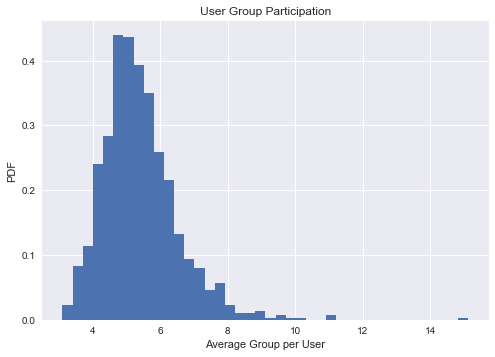

In [57]:
# Plot of the sampling distribution of the sample mean with N = 100
_ = plt.hist(sampling_dis, bins = 40, normed = True)
_ = plt.xlabel('Average Group per User')
_ = plt.ylabel('PDF')
_ = plt.title('User Group Participation')
sns.set()
plt.show()